In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
z2=pd.read_csv('/home/srg-dell/ibeems_data/download/iparkmall/z2.csv')
z3=pd.read_csv('/home/srg-dell/ibeems_data/download/iparkmall/z3.csv')
z5=pd.read_csv('/home/srg-dell/ibeems_data/download/iparkmall/z5.csv')
z7=pd.read_csv('/home/srg-dell/ibeems_data/download/iparkmall/z7.csv')
bo=pd.read_csv('/home/srg-dell/ibeems_data/download/iparkmall/bo.csv')

In [3]:
def gas_rolling(value):
    # fan power in kW
    rolling_average=60
    Ts_=60
    #value=make_monotonic(value)
    value=np.concatenate([np.array([0]),np.diff(value)])/Ts_
    df_value=pd.DataFrame(data={'value':value})
    value=df_value['value'].rolling(rolling_average,min_periods=1,center=True).mean().to_numpy()
    return value

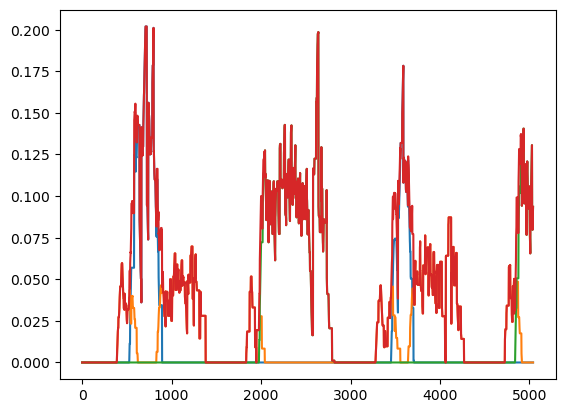

In [4]:
#plt.plot(gas_rolling(bo['cum_bo1'].to_numpy()))

P_gas1=gas_rolling(bo['cum_bo1'].to_numpy())
P_gas2=gas_rolling(bo['cum_bo2'].to_numpy())
P_gas3=gas_rolling(bo['cum_bo3'].to_numpy())

bo['P_gas1']=P_gas1
bo['P_gas2']=P_gas2
bo['P_gas3']=P_gas3

plt.plot(P_gas1,label='bo1')
plt.plot(P_gas2,label='bo2')
plt.plot(P_gas3,label='bo3')
plt.plot(P_gas1+P_gas2+P_gas3,label='total')


In [5]:
bo.columns

Index(['timestamp', 'cum_bo2', 'cum_bo1', 'cum_bo3', 'cum_bo4', 'm_bo_hws1',
       'cum_bo_hws1', 'm_bo_hws2', 'cum_bo_hws2', 'm_bo_hws3', 'cum_bo_hws3',
       'm_bo_hws4', 'cum_bo_hws4', 'P_gas1', 'P_gas2', 'P_gas3'],
      dtype='object')

In [6]:
#(bo['m_bo_hws1']/3600).plot()

bo['m_bo_hws1']=bo['m_bo_hws1']/3600
bo['m_bo_hws2']=bo['m_bo_hws2']/3600
bo['m_bo_hws3']=bo['m_bo_hws3']/3600
bo['m_bo_hws4']=bo['m_bo_hws4']/3600

In [7]:
bo['m_bo_hws1']=bo['m_bo_hws1'].rolling(60,min_periods=1,center=True).mean().to_numpy()
bo['m_bo_hws2']=bo['m_bo_hws2'].rolling(60,min_periods=1,center=True).mean().to_numpy()
bo['m_bo_hws3']=bo['m_bo_hws3'].rolling(60,min_periods=1,center=True).mean().to_numpy()
bo['m_bo_hws4']=bo['m_bo_hws4'].rolling(60,min_periods=1,center=True).mean().to_numpy()



In [8]:
def fan_rolling(value):
    # fan power in kW
    rolling_average=60
    Ts_=60
    #value=make_monotonic(value)
    value=np.concatenate([np.array([0]),np.diff(value)])*(3600/Ts_)
    df_value=pd.DataFrame(data={'value':value})
    value=df_value['value'].rolling(rolling_average,min_periods=1,center=True).mean().to_numpy()
    return value

In [9]:
z2['P_sa_z2']=fan_rolling(z2['cum_sa_z2'])
z3['P_sa_z3']=fan_rolling(z3['cum_sa_z3'])
z5['P_sa_z5']=fan_rolling(z5['cum_sa_z5'])
z7['P_sa_z7']=fan_rolling(z7['cum_sa_z7'])

In [10]:
z2['V_sa_z2']=z2['V_sa_z2']/3600
z3['V_sa_z3']=z3['V_sa_z3']/3600
z5['V_sa_z5']=z5['V_sa_z5']/3600
z7['V_sa_z7']=z7['V_sa_z7']/3600

In [11]:
z2['O_heat_z2']=z2['O_heat_z2']/100
z3['O_heat_z3']=z3['O_heat_z3']/100
z5['O_heat_z5']=z5['O_heat_z5']/100
z7['O_heat_z7']=z7['O_heat_z7']/100

In [12]:
z2['m_sa_z2']=z2['V_sa_z2']*1.2
z3['m_sa_z3']=z3['V_sa_z3']*1.2
z5['m_sa_z5']=z5['V_sa_z5']*1.2
z7['m_sa_z7']=z7['V_sa_z7']*1.2

In [13]:
#plt.plot(fan_rolling(z2['cum_sa_z2'].to_numpy()))


In [14]:
z2['timestamp']=pd.to_datetime(z2['timestamp'])
z3['timestamp']=pd.to_datetime(z3['timestamp'])
z5['timestamp']=pd.to_datetime(z5['timestamp'])
z7['timestamp']=pd.to_datetime(z7['timestamp'])

bo['timestamp']=pd.to_datetime(bo['timestamp'])


In [15]:
zid_list=['z2','z3','z5','z7']


In [16]:
for df,zid in zip([z2,z3,z5,z7],['z2','z3','z5','z7']):
    a=df[f'V_sa_{zid}'].to_numpy()
    i=df[f'i_sa_{zid}'].to_numpy()
    a[i==0]=0
    df[f'V_sa_{zid}']=a

In [17]:
for df,zid in zip([z2,z3,z5],['z2','z3','z5']):
    #a=df[f'V_sa_{zid}'].to_numpy()
    i=df[f'O_heat_{zid}'].to_numpy()
    i=(i>0)*77.5 # hws temp # 77.5 for HWS
    #a[i==0]=0
    df[f'T_hws_{zid}']=i

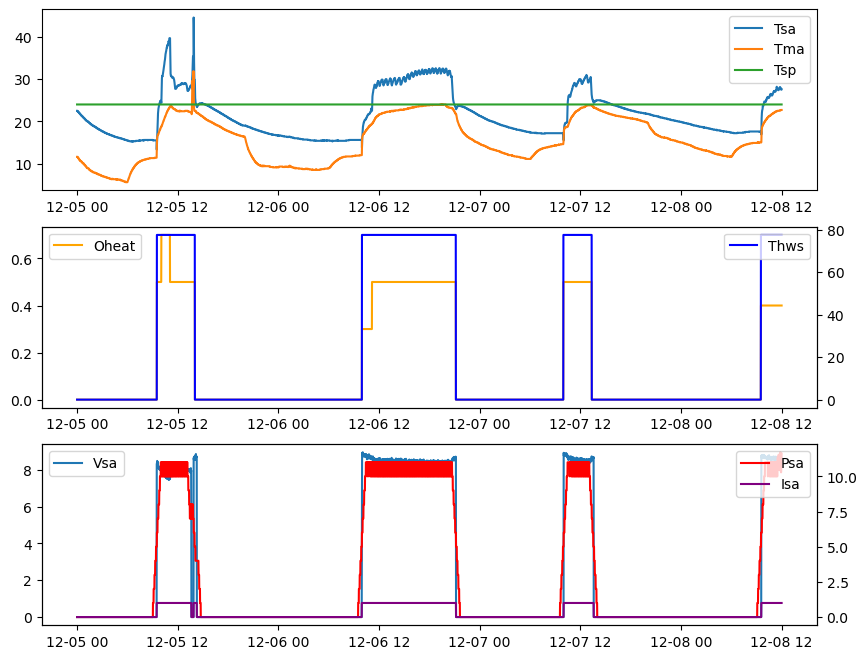

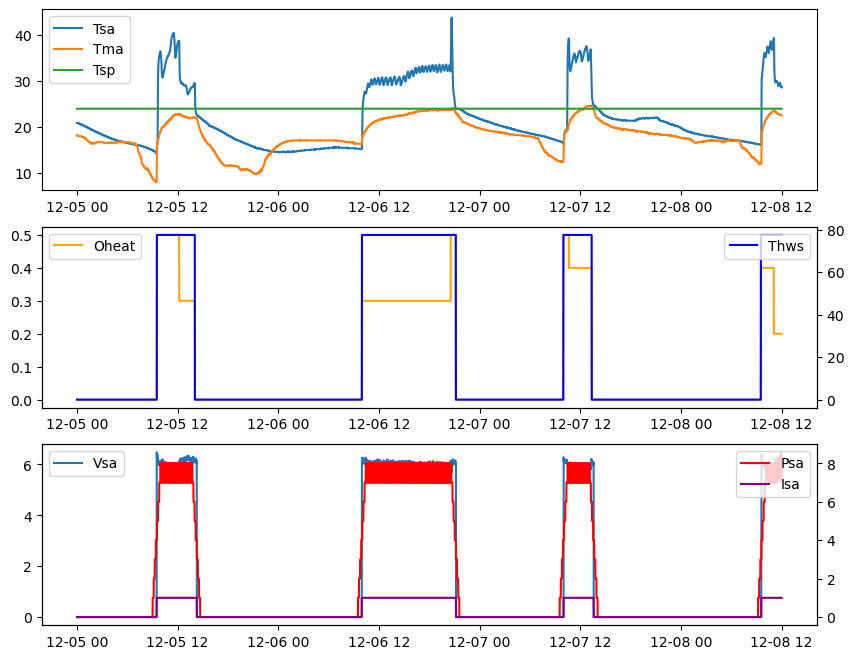

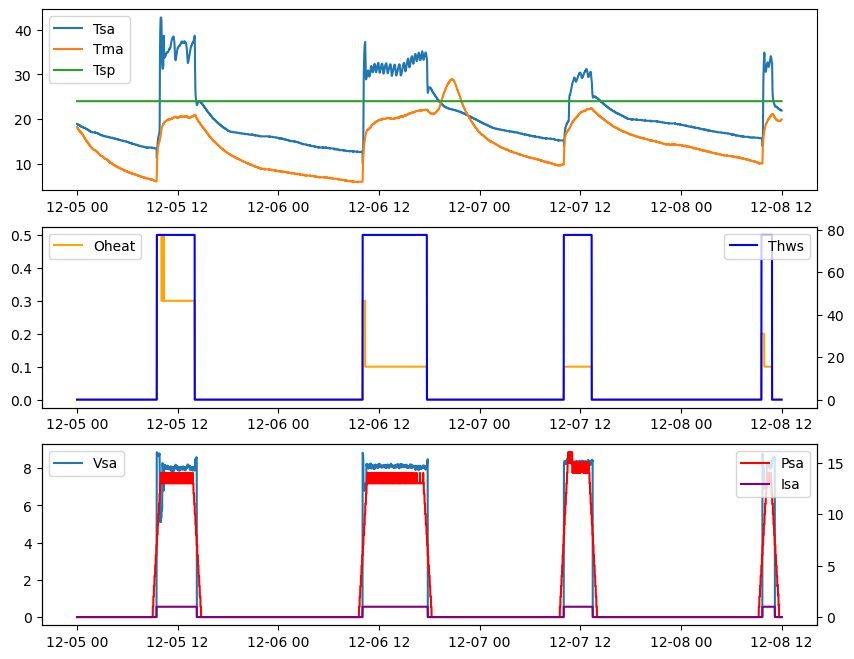

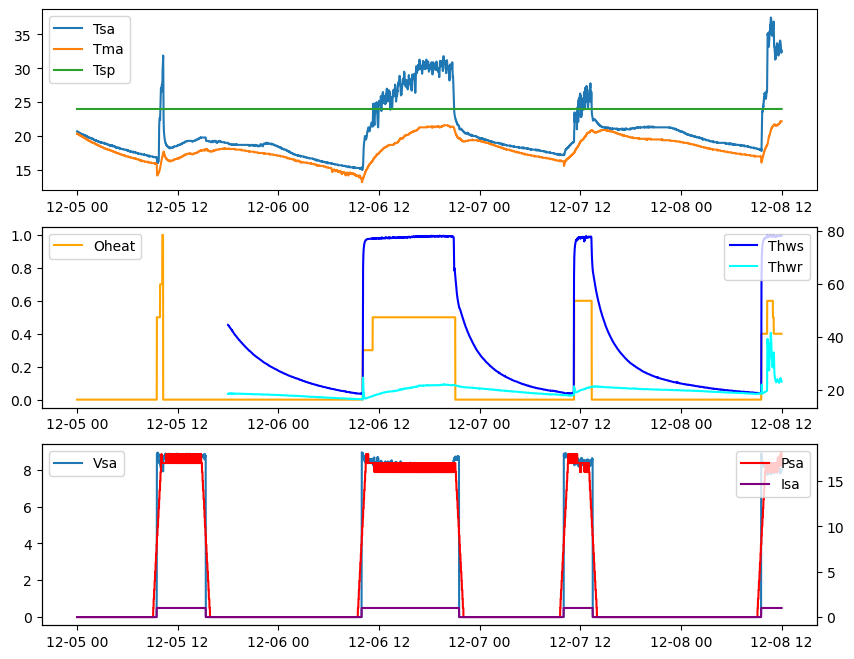

In [18]:
#zid='z7'

for df,zid in zip([z2,z3,z5,z7],['z2','z3','z5','z7']):
    #df=z7.copy()

    fig,ax=plt.subplots(3,1,figsize=(10,8))
    ax[0].plot(df['timestamp'],df[f'T_sa_{zid}'],label='Tsa')
    ax[0].plot(df['timestamp'],df[f'T_ma_{zid}'],label='Tma')
    ax[0].plot(df['timestamp'],df[f'T_sp_{zid}'],label='Tsp')
    #ax[1].plot(df['timestamp'],df[f'i_sa_{zid}'],label='Isa',color='green')

    if f'T_hws_{zid}' in df.columns:
        ax1= ax[1].twinx()
        ax1.plot(df['timestamp'],df[f'T_hws_{zid}'],label='Thws',color='blue')
        if f'T_hwr_{zid}' in df.columns:
            #ax1= ax[1].twinx()
            ax1.plot(df['timestamp'],df[f'T_hwr_{zid}'],label='Thwr',color='cyan')
        
        ax1.legend(loc='upper right')
        
        #ax1.legend(loc='upper right')
    ax[1].plot(df['timestamp'],df[f'O_heat_{zid}'],label='Oheat',color='orange')
    ax[2].plot(df['timestamp'],df[f'V_sa_{zid}'],label='Vsa')
    ax2=ax[2].twinx()
    ax2.plot(df['timestamp'],df[f'P_sa_{zid}'],label='Psa',color='red')
    ax2.plot(df['timestamp'],df[f'i_sa_{zid}'],label='Isa',color='purple')
    ax[0].legend()
    ax[1].legend(loc='upper left')
    ax[2].legend(loc='upper left')
    ax2.legend(loc='upper right')

In [19]:
df_list=[z3,z5,z7,bo]

df_all=z2.copy()
for df_ in df_list:
    df_all=pd.merge(df_all,df_,on='timestamp',how='left')

In [20]:
df_all.set_index('timestamp',inplace=True)

In [21]:

season='winter'
start_time=pd.Timestamp("2025-12-06")


#end_time=start_time+pd.Timedelta("240 h")
df_=df_all[(df_all.index>=start_time)].copy()
#df_=df[(df.index>=start_time) & (df.index<end_time)].copy()
df_['time']=np.arange(df_.shape[0])*60



In [22]:
df_['RH_oa']=0.3

In [23]:
zone_id_list=['z2','z3','z5','z7']

In [24]:
df_.columns

Index(['T_oa', 'T_sa_z2', 'T_ma_z2', 'T_ra_z2', 'T_sp_z2', 'RH_sa_z2',
       'RH_ra_z2', 'V_sa_z2', 'V_ra_z2', 'O_hum_z2',
       ...
       'cum_bo_hws2', 'm_bo_hws3', 'cum_bo_hws3', 'm_bo_hws4', 'cum_bo_hws4',
       'P_gas1', 'P_gas2', 'P_gas3', 'time', 'RH_oa'],
      dtype='object', length=102)

In [25]:
df_['P_gas']=df_['P_gas1']+df_['P_gas2']+df_['P_gas3']
df_['m_bo_hws']=df_['m_bo_hws1']+df_['m_bo_hws2']+df_['m_bo_hws3']+df_['m_bo_hws4']


In [34]:
df_['i_boiler']=((df_['P_gas']>0)*1).astype(int)

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

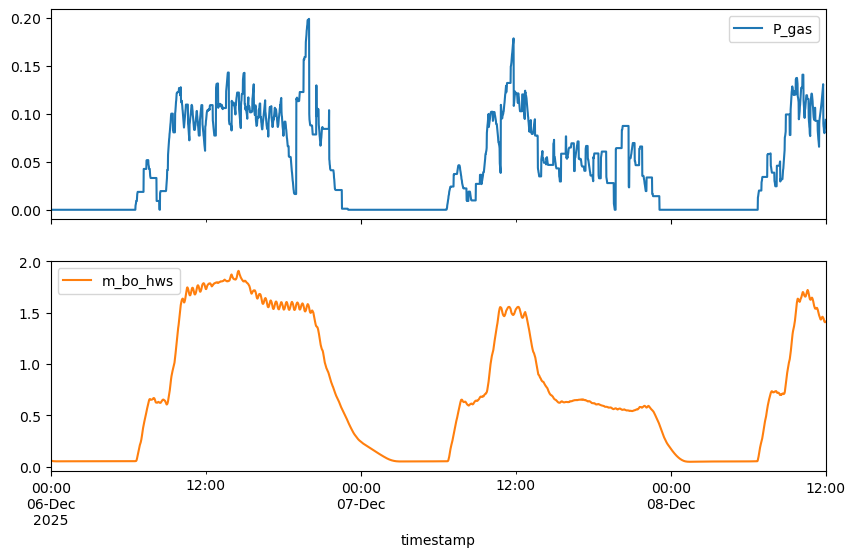

In [33]:
df_[['P_gas','m_bo_hws']].plot(subplots=True,figsize=(10,6))

In [35]:

# 1 time
# 2 RH_oa => in_oa_RH_ahu
# 3 T_oa = > in_oa_temp_dry_C_ahu
# 4 P_gas
# 5 m_bo_hws

# 6 T_sp_z2 => in_cooling_SP_C_ahu
# 7
# 8
# 9

# 10 T_ra_z2 => in_room_temp_C_ahu
# 14 O_oa_z2 => in_damper_position_ahu
# 18 i_sa_z2 => in_fan_speed_ahu
# 22 T_hws_z2 => in_hot_water_temp_C_ahu
# 26 i_sa_z2 => in_heating_signal_ahu
# 30 T_sa_z2 => out_supply_air_temp_C_ahu
# 34 T_ma_z2 => out_mixed_air_temp_C_ahu
# 38 P_sa_z2 => out_fan_power_kW_ahu
# 42 O_heat_z2 => new_variable.


common_cnames=['time','RH_oa',f'T_oa','P_gas','m_bo_hws']#,'RH_oa']
# zone_ahu_cnames=[]
ahu_cnames=[f'T_sp_',f'T_ra_',f'O_oa_',
                 f'i_sa_',f'T_hws_',f'i_sa_',
                  f'T_sa_',f'T_ma_',f'P_sa_',f'O_heat_',f'm_sa_']

for ac in ahu_cnames:
    for zid in zone_id_list:
        common_cnames.append(ac+zid)


common_cnames.append('i_boiler')
    
#for zid in zone_id_list:
    
    
    #zone_ahu_cnames.append(ahu_cnames)


In [36]:
list(common_cnames)


['time',
 'RH_oa',
 'T_oa',
 'P_gas',
 'm_bo_hws',
 'T_sp_z2',
 'T_sp_z3',
 'T_sp_z5',
 'T_sp_z7',
 'T_ra_z2',
 'T_ra_z3',
 'T_ra_z5',
 'T_ra_z7',
 'O_oa_z2',
 'O_oa_z3',
 'O_oa_z5',
 'O_oa_z7',
 'i_sa_z2',
 'i_sa_z3',
 'i_sa_z5',
 'i_sa_z7',
 'T_hws_z2',
 'T_hws_z3',
 'T_hws_z5',
 'T_hws_z7',
 'i_sa_z2',
 'i_sa_z3',
 'i_sa_z5',
 'i_sa_z7',
 'T_sa_z2',
 'T_sa_z3',
 'T_sa_z5',
 'T_sa_z7',
 'T_ma_z2',
 'T_ma_z3',
 'T_ma_z5',
 'T_ma_z7',
 'P_sa_z2',
 'P_sa_z3',
 'P_sa_z5',
 'P_sa_z7',
 'O_heat_z2',
 'O_heat_z3',
 'O_heat_z5',
 'O_heat_z7',
 'm_sa_z2',
 'm_sa_z3',
 'm_sa_z5',
 'm_sa_z7',
 'i_boiler']

In [28]:
df_.columns

Index(['T_oa', 'T_sa_z2', 'T_ma_z2', 'T_ra_z2', 'T_sp_z2', 'RH_sa_z2',
       'RH_ra_z2', 'V_sa_z2', 'V_ra_z2', 'O_hum_z2',
       ...
       'cum_bo_hws3', 'm_bo_hws4', 'cum_bo_hws4', 'P_gas1', 'P_gas2', 'P_gas3',
       'time', 'RH_oa', 'P_gas', 'm_bo_hws'],
      dtype='object', length=104)

In [37]:

import scipy.io as sio
for i,cn in enumerate(common_cnames):
    print(i+1,cn)

out_dat=df_[common_cnames].interpolate().to_numpy()
sio.savemat(f"iparkmall_{season}_{start_time.strftime('%Y-%m-%d')}.mat",{"names":ahu_cnames,"data":out_dat})

1 time
2 RH_oa
3 T_oa
4 P_gas
5 m_bo_hws
6 T_sp_z2
7 T_sp_z3
8 T_sp_z5
9 T_sp_z7
10 T_ra_z2
11 T_ra_z3
12 T_ra_z5
13 T_ra_z7
14 O_oa_z2
15 O_oa_z3
16 O_oa_z5
17 O_oa_z7
18 i_sa_z2
19 i_sa_z3
20 i_sa_z5
21 i_sa_z7
22 T_hws_z2
23 T_hws_z3
24 T_hws_z5
25 T_hws_z7
26 i_sa_z2
27 i_sa_z3
28 i_sa_z5
29 i_sa_z7
30 T_sa_z2
31 T_sa_z3
32 T_sa_z5
33 T_sa_z7
34 T_ma_z2
35 T_ma_z3
36 T_ma_z5
37 T_ma_z7
38 P_sa_z2
39 P_sa_z3
40 P_sa_z5
41 P_sa_z7
42 O_heat_z2
43 O_heat_z3
44 O_heat_z5
45 O_heat_z7
46 m_sa_z2
47 m_sa_z3
48 m_sa_z5
49 m_sa_z7
50 i_boiler


In [30]:
import os
os.getcwd()


'/home/srg-dell/ibeems_data/notebook'